## Compressione mediante PCA

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from pylab import subplot,imshow,title,gray,NullLocator
from numpy import linalg
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

Funzione che proietta i vettori in $M$ nello spazio generato dai primi numpc autovettori da vec

In [4]:
def pca(M,vec,numpc=0):
    # extract eigenvectors corresponding to the first numpc eigenvalues, this is a basis in a spce of dimension numpc
    basis = vec[:,range(numpc)]
    # projection of the data in the new space of dimension numpc
    projections = np.dot(M,basis) 
    #return eigenvectors and projections
    return basis,projections

Calcolo di autovalori e autovettori della matrice di covarianza associata alle righe di $A$

In [5]:
def get_eigen(A):
    # computing eigenvalues and eigenvectors of the covariance matrix
    # of the set of vectors corresponding to rows of A
    # compute mean for each column (feature)
    means = np.mean(A,axis=0)
    # subtract the mean (along columns): each feature has now zero mean
    M = (A-means)
    # derive the covariance matrix of the set of vectors corresponding to rows of A
    c = np.cov(M, rowvar=0)
    # compute the sets of eigenvalues and eigenvectors of the covariance matrix
    [evals,evects] = np.linalg.eig(c)
    # compute indices of eigenvalues sorted in descending order
    idx = np.argsort(evals) 
    # derive indices of eigenvalues sorted in ascending order
    idx = idx[::-1]       
    # sort eigenvectors (columns of evects) according to the sorted eigenvalues
    evects = evects[:,idx]
    # sort eigenvalues in ascending order
    evals = evals[idx] 
    return evals, evects, M

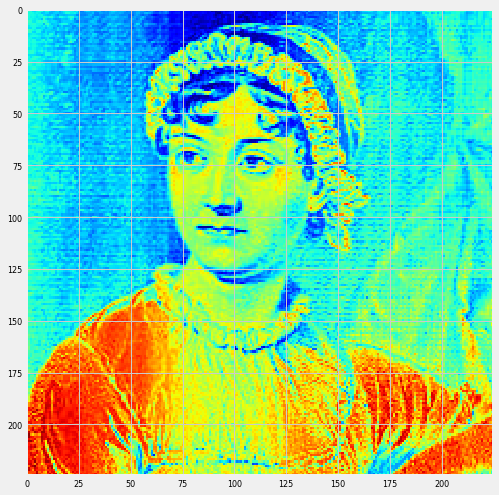

In [8]:
img =plt.imread('../dataset/austen.jpg') # load an image
bw = np.mean(img,2)
full_pc = bw.shape[0]
val,vec,bw_c=get_eigen(bw)
imshow(bw_c)

Plot degli autovalori ordinati in modo non crescente

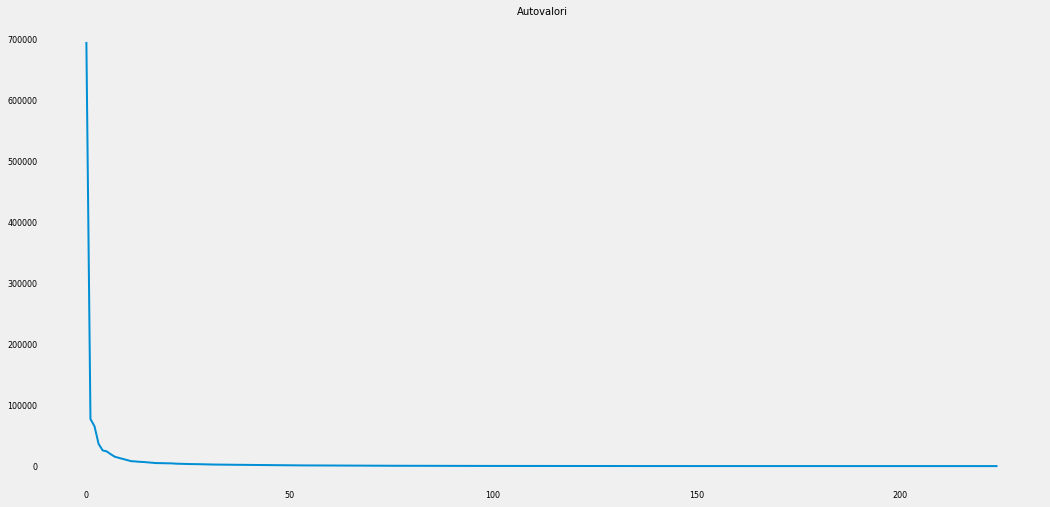

In [9]:
fig = plt.figure()
ax = fig.gca()
ax.plot(val)
ax.grid()
plt.title('Autovalori')
plt.show()

Plot delle immagini corrispondenti alla proiezione dell'immagine originale nello spazio generato dai primi $i$ autovettori, proiettata nuovamente nello spazio originale

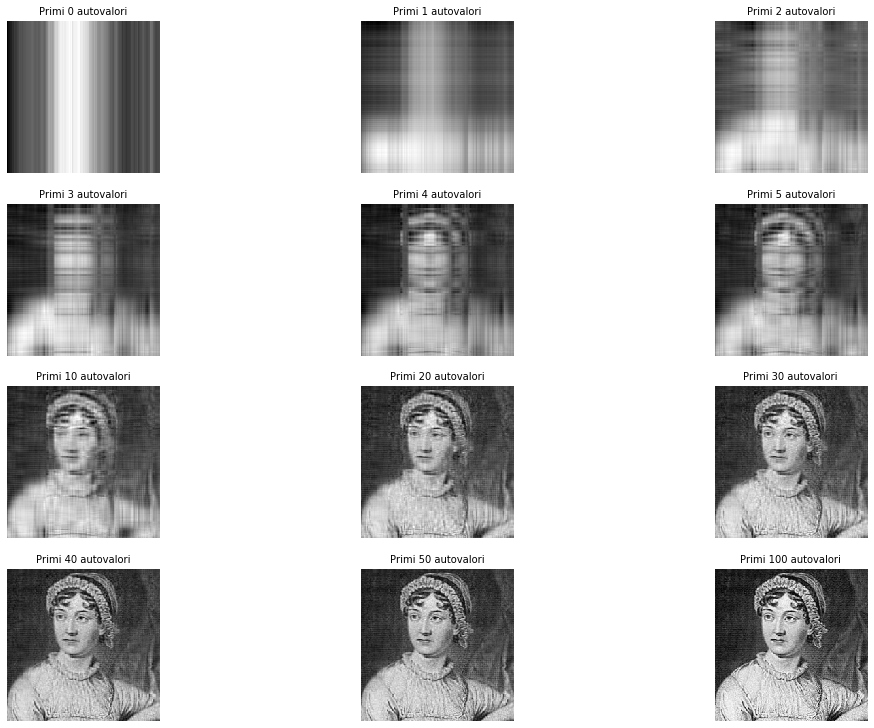

In [10]:
i = 1
dist = []
fig = plt.figure(figsize=(16,12))
fig.patch.set_facecolor('white')
for numpc in [0,1,2,3,4,5]+range(10,51,10)+[100]: # 0 10 20 ... full_pc
    # compute projections on a space of dimension numpc
    coeff, score = pca(bw_c,vec,numpc)
    # compute projections back into a space of original dimension
    bw_rec = np.dot(score,coeff.T) 
    # add back feature means
    bw_rec = bw_rec+np.mean(bw,axis=0) 
    # difference in Frobenius norm between original and compressed images
    dist.append(linalg.norm(bw-bw_rec,'fro'))
    # plot image
    ax = subplot(4,3,i,frame_on=False, axisbg="#F8F8F8")
    ax.xaxis.set_major_locator(NullLocator()) # remove ticks
    ax.yaxis.set_major_locator(NullLocator())
    i += 1 
    imshow(bw_rec)
    title('Primi '+str(numpc)+' autovalori')
    gray()

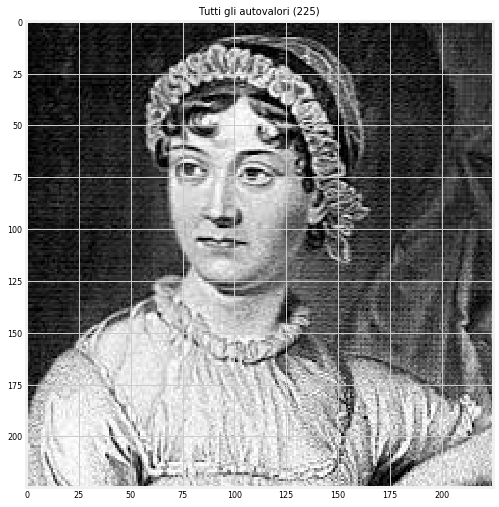

In [11]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.gca()
imshow(bw)
plt.title('Tutti gli autovalori ('+str(full_pc)+')')
plt.show()

Differenza tra l'immagine originaria e quelle derivanti dalla compressione, misurata mediante norma di Frobenius

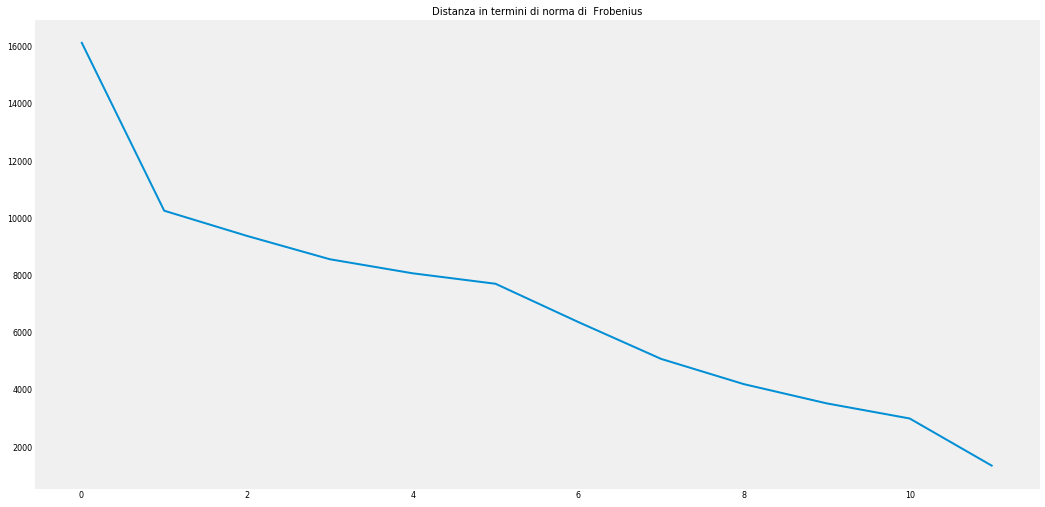

In [12]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.gca()
ax.plot(dist, c=colors[0])
ax.grid()
plt.title('Distanza in termini di norma di  Frobenius')
plt.show()